#  <u>*Final Task : Pepper Pirate Paradise Ltd. Analysis .*</u>

## <u>*Analysis objective*</u>
### <u>*To predict and forecast the selling prices of Bell Peppers of different colors (green, red, yellow)*</u>

---

## *Importing essintial Libraries*

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import matplotlib
matplotlib.rcParams["figure.figsize"]=(20,10)
import seaborn as sns;sns.set()
import warnings
warnings.filterwarnings('ignore')
import plotly.express as px
from datetime import datetime,time
from plotly.offline import iplot,plot,init_notebook_mode,download_plotlyjs
%matplotlib inline 
init_notebook_mode(connected=True)


---

## <u>*Importing data*</u>

In [2]:
df=pd.read_csv(r"C:\Users\Omar\Desktop\SiTeck\Month_1\Final_Project_data\actual_data.csv")
df.head()

,week_start_dt,week_end_dt,vietnam_season,p_color,price,total_volume,brazil,india,vietnam,indonesia,china,brazil_season,indonesia_season,india_season,china_season,jordan_max_price,jordan_min_price,demand,supply
0,2015-08-17,2015-08-23,1,yellow,7.249725,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,True,True,True,True,7.425,7.025,0.5,0.5
1,2015-08-17,2015-08-23,1,red,7.600215,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,True,True,True,True,8.125,7.825,0.5,0.5
2,2015-08-17,2015-08-23,1,green,7.074805,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,True,True,True,True,7.525,7.225,0.5,0.5
3,2015-08-24,2015-08-30,1,green,7.025085,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,True,True,True,True,7.425,7.225,0.5,0.5
4,2015-08-24,2015-08-30,1,red,7.722255,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,True,True,True,True,8.125,7.825,0.5,0.5


In [3]:
df2=pd.read_csv(r"C:\Users\Omar\Desktop\SiTeck\Month_1\Final_Project_data\projection_outside_supply.csv")
df2

,week_end_dt,brazil,india,vietnam,indonesia,china,brazil_season,indonesia_season,india_season,china_season,total_volume
0,2023-10-08,62609.9,0,2365023.5,27739.8,8678.3,False,False,True,False,2464051.7
1,2023-10-15,22744.0,0,2345998.8,15052.6,6508.7,False,False,True,False,2390304.2
2,2023-10-22,10961.5,0,2555267.6,0.0,15187.1,False,False,True,False,2581416.4
3,2023-10-29,9211.5,0,2530537.9,0.0,15187.1,False,False,True,False,2554936.6


---

## <u>*Data set information*</u>

* week_start_dt: the start day of the week (Monday).
* Bell Pepper Identifiers Columns:
* p_color: the different colors of the Bell Pepper.
* price: the selling price of the Bell Pepper.
* jordan_max_price: the maximum price of Bell Peppers by Jordanian Ministry of Food & Drugs.
* jordan_min_price: the minimum price of Bell Peppers by Jordanian Ministry of Food & Drugs.
* supply: supply of Pepper Pirate Paradise Ltd. for Bell Pepper.
* demand: demand of Pepper Pirate Paradise Ltd. for Bell Pepper.
* vietnam: supply of vietnam.
* india: supply of india.
* indonesia: supply of indonesia.
* brazil: supply of brazil.
* china: supply of china.
* total_volume: total supply volume for all countries.
* vietnam_season: if Vietnam is in the harvesting season or not.
* india_season: if India is in the harvesting season or not.
* indonesia_season: if indonesia is in the harvesting season or not.
* brazil_season: if Brazil is in the harvesting season or not.
* china_season: if China is in harvesting season or not


## <u>*Data shape*</u>

In [4]:
df.shape

(1272, 19)

In [5]:
df2.shape

(4, 11)

---

## <u>*B. Data checks to perform*</u>
* *Missing Values*
* *Duplicates Values*
* *Data type*
* *Unique values is each colum*
* *Check statistics of data set*


### *B.1 <BR>na-values*

In [6]:
df.isna().sum()

week_start_dt        0
week_end_dt          0
vietnam_season       0
p_color              0
price                0
total_volume         0
brazil               0
india                0
vietnam              0
indonesia            0
china                0
brazil_season        0
indonesia_season     0
india_season         0
china_season         0
jordan_max_price    31
jordan_min_price    31
demand               0
supply               0
dtype: int64


*for the Null values in the features (jordan_max_price & jordan_min_price) we decided to replace it using the interpolation function as below*

In [7]:
df.interpolate(method="linear",inplace=True,limit_direction="backward")

*Considered the 1st 56 rows as null values and drop it from the model as the numbers of volums are not helpfull*

In [8]:
df.drop(index=df.index[0:57],axis=0,inplace=True)

### *B.2<BR> Duplicated Values*

In [9]:
df.duplicated().sum()

0

### *B.3<BR> Data info*

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1215 entries, 57 to 1271
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   week_start_dt     1215 non-null   object 
 1   week_end_dt       1215 non-null   object 
 2   vietnam_season    1215 non-null   int64  
 3   p_color           1215 non-null   object 
 4   price             1215 non-null   float64
 5   total_volume      1215 non-null   float64
 6   brazil            1215 non-null   float64
 7   india             1215 non-null   float64
 8   vietnam           1215 non-null   float64
 9   indonesia         1215 non-null   float64
 10  china             1215 non-null   float64
 11  brazil_season     1215 non-null   bool   
 12  indonesia_season  1215 non-null   bool   
 13  india_season      1215 non-null   bool   
 14  china_season      1215 non-null   bool   
 15  jordan_max_price  1215 non-null   float64
 16  jordan_min_price  1215 non-null   float64

### *B.4<BR>Nunique values is each colum*

In [11]:
df.nunique()

week_start_dt        405
week_end_dt          405
vietnam_season         3
p_color                3
price                809
total_volume         405
brazil               336
india                177
vietnam              405
indonesia            185
china                 82
brazil_season          2
indonesia_season       2
india_season           2
china_season           2
jordan_max_price     101
jordan_min_price      97
demand              1196
supply               890
dtype: int64

### *Replacee some values:*<br>
*For values equal .5 in the feature supply ,we will replace it with the percent differnce in the mean between supply and demand since there always an interaction point between them*

In [12]:
demand_supply_ave=round(df["supply"].mean() /df["demand"].mean(),2)

In [13]:
A=df[:315]

In [14]:
A["supply"]=A["demand"]*demand_supply_ave

In [15]:
df.drop(index=df.index[:315],axis=0,inplace=True)

In [16]:
df=pd.concat([A,df],axis=0)


---

In [17]:
df.head()

,week_start_dt,week_end_dt,vietnam_season,p_color,price,total_volume,brazil,india,vietnam,indonesia,china,brazil_season,indonesia_season,india_season,china_season,jordan_max_price,jordan_min_price,demand,supply
57,2015-12-28,2016-01-03,2,green,6.599075,1596040.2,10793.5,65658.1,1519588.5,0.0,0.0,False,False,False,False,6.625,6.325,0.50,0.1650
58,2015-12-28,2016-01-03,2,red,7.175335,1596040.2,10793.5,65658.1,1519588.5,0.0,0.0,False,False,False,False,7.525,7.125,0.51,0.1683
59,2015-12-28,2016-01-03,2,yellow,7.300575,1596040.2,10793.5,65658.1,1519588.5,0.0,0.0,False,False,False,False,7.425,7.025,16.55,5.4615
60,2016-01-04,2016-01-10,2,yellow,7.379675,2295578.0,5677.8,15274.4,2274625.7,0.0,0.0,False,False,False,False,7.525,7.025,271.16,89.4828
61,2016-01-04,2016-01-10,2,red,7.175335,2295578.0,5677.8,15274.4,2274625.7,0.0,0.0,False,False,False,False,7.625,7.125,42.33,13.9689


In [20]:
df.to_csv(r"C:\Users\Omar\Desktop\Omar_Files\Python_Analysis\Siteck_ML\Pepper _Price_Analysis\Data_Sets\data_set_for_stats.csv", index=False)

---

## *C.* <U>*Insights*</U>

### *C.1<BR>Pre Insights :*
* *convert week end to date and extract year,month,week*
* *drop week Start*
* *convert vietnam_season object or str*
* *define numerical and categorical features*


In [91]:
df.drop("week_start_dt",axis=1,inplace=True)

In [92]:
for col in df:
    if col in ["week_end_dt"]:
        df[col]=pd.to_datetime(df[col])
        df["year"]=df[col].dt.year
        df["month"]=df[col].dt.month
        df["week"]=df[col].dt.strftime('%U').astype(int) + 1

In [93]:
df["vietnam_season"]=df["vietnam_season"].astype("str")

In [94]:
categorical_features=df.select_dtypes(include=["object","bool"])
numerical_features=df.select_dtypes(exclude=["object","bool","datetime64[ns]"])

In [95]:
print("we have {} categorical features : {}".format(categorical_features.shape[1],list(categorical_features.columns)))

we have 6 categorical features : ['vietnam_season', 'p_color', 'brazil_season', 'indonesia_season', 'india_season', 'china_season']


In [96]:
print("we have {} numerical features : {}".format(numerical_features.shape[1],list(numerical_features.columns)))

we have 14 numerical features : ['price', 'total_volume', 'brazil', 'india', 'vietnam', 'indonesia', 'china', 'jordan_max_price', 'jordan_min_price', 'demand', 'supply', 'year', 'month', 'week']


### *C.2<BR>Insights :*

In [97]:
for col in categorical_features :
        print("The count of unique categries in the feaure",df.groupby(col)[col].value_counts(),"\n------")

The count of unique categries in the feaure vietnam_season
1    414
2    486
3    315
Name: count, dtype: int64 
------
The count of unique categries in the feaure p_color
green     405
red       405
yellow    405
Name: count, dtype: int64 
------
The count of unique categries in the feaure brazil_season
False    690
True     525
Name: count, dtype: int64 
------
The count of unique categries in the feaure indonesia_season
False    903
True     312
Name: count, dtype: int64 
------
The count of unique categries in the feaure india_season
False    912
True     303
Name: count, dtype: int64 
------
The count of unique categries in the feaure china_season
False    801
True     414
Name: count, dtype: int64 
------


* *Insights From the above tables :*</u><br>
1. *The season _2_ has the highest frequency among vietnam seasons*<br>
2. *India and indonesia being on season are very much less than not being on season (almost 1:3)*<br>
3. *brazil being on season is doing very much better than others*<br>

#### *C.2.1 <br>Mean Price and Mean Price change over years by "p_color" feature*

In [98]:
pd.pivot_table(data=df,index="p_color",columns="year",values="price",aggfunc="mean",fill_value=0)

year,2016,2017,2018,2019,2020,2021,2022,2023
p_color,,,,,,,,
green,6.961827,7.648627,6.989052,7.591270,6.785126,6.982395,7.732820,6.962630
red,7.631681,8.652293,7.711202,8.325247,7.178891,7.457629,8.500397,7.495846
yellow,8.612679,9.790707,8.313073,9.006849,8.237391,8.948136,9.710339,8.758655


In [99]:
pd.pivot_table(data=df,index="p_color",columns="year",values="price",aggfunc="mean",fill_value=0,margins=True).pct_change(axis=1)

year,2016,2017,2018,2019,2020,2021,2022,2023,All
p_color,,,,,,,,,
green,NaN,0.098652,-0.086234,0.086166,-0.106194,0.029074,0.107474,-0.099600,0.036252
red,NaN,0.133734,-0.108768,0.079630,-0.137696,0.038827,0.139826,-0.118177,0.051535
yellow,NaN,0.136778,-0.150922,0.083456,-0.085430,0.086283,0.085180,-0.098007,0.019474
All,NaN,0.124339,-0.117980,0.082997,-0.109213,0.053454,0.109260,-0.105091,0.034857


* *Insights From the above tables :*</u><br>
1.  *Clearly we can see that the price mean for each color has changed over years ;*<br>
2.  *In 2017,2019,2021 & 2022 the price mean has increased compared to the previous year*<br>
3.  *In 2018,2020 & 2023 the price mean has decreased compared to the previous year*<br>

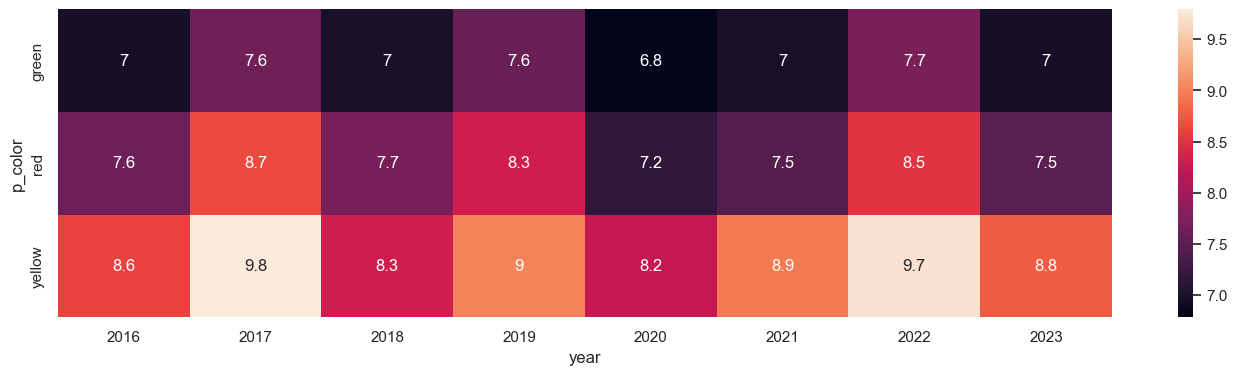

In [100]:
fig, ax = plt.subplots(figsize=(17, 4))
sns.heatmap(pd.pivot_table(data=df,index="p_color",columns="year",values="price",aggfunc="mean",fill_value=0),annot=True);

<Axes: xlabel='year'>

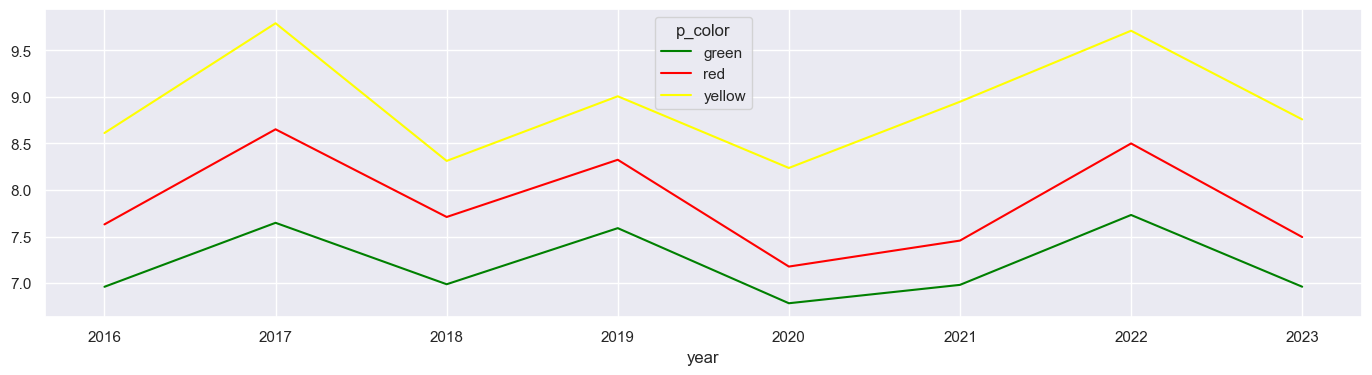

In [101]:
fig, ax = plt.subplots(figsize=(17, 4))
sns.lineplot(data=pd.pivot_table(data=df,index="year",columns="p_color",values="price",aggfunc="mean",fill_value=0),
             palette=['green', 'red','yellow'],dashes=False,)

#### *C.2.2 <br>Mean Price over years by "vietnam_season" feature*

In [102]:
pd.pivot_table(data=df,index="vietnam_season",columns="year",values="price",aggfunc="mean",fill_value=0,margins=True)

year,2016,2017,2018,2019,2020,2021,2022,2023,All
vietnam_season,,,,,,,,,
1,8.461868,9.850618,8.123501,9.302272,7.379042,8.214851,8.635830,8.366485,8.538893
2,7.603692,7.820821,7.342067,7.132924,7.158987,7.475666,7.809326,7.036705,7.456648
3,7.008277,8.739437,7.636358,8.828672,7.820225,7.768094,10.082618,7.458803,8.164004
All,7.735396,8.697209,7.671109,8.307789,7.400469,7.796053,8.647852,7.739044,8.008801


In [103]:
pd.pivot_table(data=df,index="vietnam_season",columns="year",values="price",aggfunc="mean",fill_value=0,margins=True).pct_change(axis=1)

year,2016,2017,2018,2019,2020,2021,2022,2023,All
vietnam_season,,,,,,,,,
1,NaN,0.164119,-0.175331,0.145106,-0.206748,0.113268,0.051246,-0.031189,0.020607
2,NaN,0.028556,-0.061215,-0.028486,0.003654,0.044235,0.044633,-0.098936,0.059679
3,NaN,0.247016,-0.126219,0.156136,-0.114224,-0.006666,0.297953,-0.260231,0.094546
All,NaN,0.124339,-0.117980,0.082997,-0.109213,0.053454,0.109260,-0.105091,0.034857


* *Insights From the above tables :*</u><br>
1.  *Season _1_ has the highest price mean compared with othrs seasons,then season _3_ ,and the lowest is season _2_*<br>

* *season 1:   8.660927*<br>
* *season 2:   7.512739*<br>
* *season 3:   8.106417*<br>

2.  *The price mean for each color has changed over years ;*<br>
3.  *In 2017,2022 the price mean has increased compared to the previous year for for all seasons*<br>
4.  *In 2018,2023 the price mean has decreased compared to the previous year for for all seasons*<br>

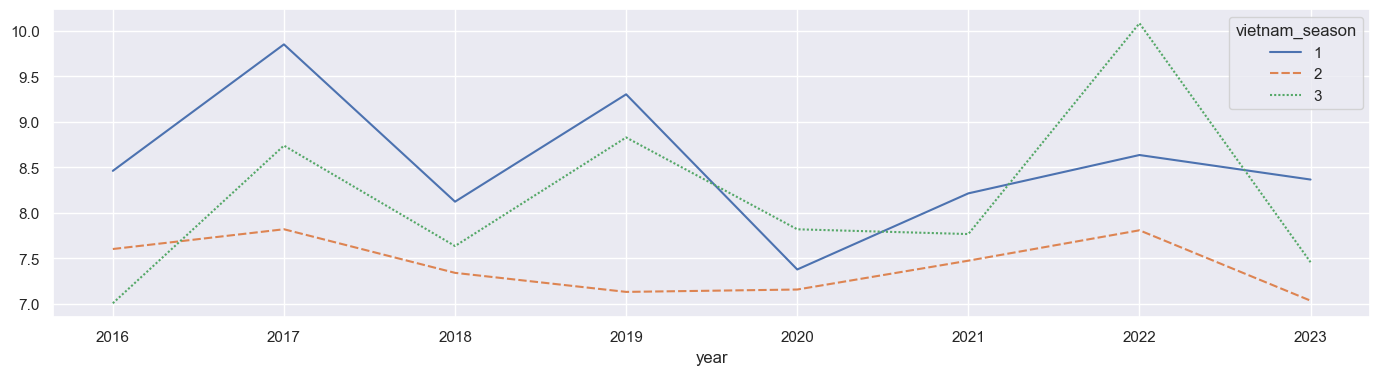

In [104]:
fig, ax = plt.subplots(figsize=(17, 4))
sns.lineplot(pd.pivot_table(data=df,index="year",columns="vietnam_season",values="price",aggfunc="mean",fill_value=0));

#### *C.2.3 <br>Mean Price over years "vietnam_season & month" features*

In [105]:
pd.pivot_table(data=df,index=["vietnam_season","month"],columns="year",values="price",aggfunc="mean",fill_value=0,margins=True)

year                      2016       2017      2018       2019      2020  \
vietnam_season month                                                       
1              6      8.199191   8.746291  7.481107  11.657056  7.529207   
               7      8.407738   8.757917  8.042950   9.594335  7.418655   
               8      7.734917  10.577989  9.173488   8.586846  7.428109   
               9      9.273130  11.202973  7.749500   8.088309  7.193503   
               10     9.183295  10.308202  0.000000   7.646403  7.116757   
2              1      7.003525   7.407764  7.461562   7.129695  7.262473   
               2      6.843630   7.921179  7.464104   7.106813  7.965575   
               3      6.741365   8.552002  7.371915   7.285070  8.241483   
               10     9.643770   8.494038  7.326880   7.267351  6.963328   
               11     7.518617   7.244884  7.419446   7.009460  6.696623   
               12     7.374542   7.929532  7.093121   7.144081  6.702988   
3              3      6.719142   8.405478  7.534496   7.776338  8.083377   
               4      6.667256   8.864258  7.865533   9.239527  7.821783   
               5      7.317213   8.877065  7.479977   9.224354  7.608457   
               6      7.695085   8.566692  7.421593   9.811860  0.000000   
All                   7.735396   8.697209  7.671109   8.307789  7.400469   

year                      2021       2022      2023       All  
vietnam_season month                                           
1              6      7.530713  11.177820  8.309499  8.887650  
               7      8.195907   8.883393  9.001657  8.548753  
               8      8.541837   7.818895  8.602208  8.524327  
               9      8.495922   7.562479  7.560483  8.363029  
               10     7.583823   7.333183  7.642700  8.116338  
2              1      6.872300   8.614308  6.980130  7.346082  
               2      7.015810   8.808210  7.062413  7.523467  
               3      0.000000   9.183370  7.216752  7.798851  
               10     7.670080   7.166592  0.000000  7.842211  
               11     7.779031   6.981335  0.000000  7.217041  
               12     8.191952   6.931427  0.000000  7.343139  
3              3      7.984408   8.875006  7.472257  7.866505  
               4      7.798806  10.149897  7.476652  8.221180  
               5      7.605067  10.629921  7.384368  8.268510  
               6      7.595123  10.699830  7.626942  8.488161  
All                   7.796053   8.647852  7.739044  8.008801

* *Insights From the above tables :*</u><br>

1. *season _1_ is considerd in the months 6,7,8,9 & 10*<br>
2. *season _2_ is considerd in the months 1,2,3,10,11 & 12*<br>
3. *season _3_ is considerd in the months 3,4,5 & 6*<br>
4. *The month 10 is common between season 1 and 2*<br>
5. *The month 6 is common between season 1 and 3*<br>
6. *The month 3 is common between season 2 and 3*<br>

* *Based on what we observed above ; we can say that the seasons are divided based on the weather conditions as below :*<br> 
1. *season _1_ in the summer*<br>
2. *season _2_ in the winter*<br>
3. *season _3_ in Fair weather*

* *Now we can understand that when we are in the summer months (season 1) price mean is the highest due to the weather status*<br>
* *also when we are in the Fair weather (season 3) price mean is lower than season 1*<br>
* *also ;noticing that when we are in the winter months (season 2) price mean is lowest even despite of the fact of cold weather ,this is due to the highest counts among seasons*<br>
* *Weather impact on peppers :*<br>
*Peppers thrive when temperatures are warm. Being sensitive to the cold, planting should be delayed until the danger of frost is past in the spring. Ideal temperatures are 70°F to 80°F during the day, and 60°F to 70° F at night.*<br>
*If you wantto read about this in details click on the [link ](https://www.canr.msu.edu/resources/how_to_grow_peppers_part_2#:~:text=Ideal%20temperatures%20are%2070%C2%B0,often%20results%20in%20blossom%20drop.)**

#### *C.2.4 <br>Mean Price over time "by all countries in all seasons"*

In [106]:
pd.pivot_table(data=df,columns='year',index=['brazil_season','indonesia_season','india_season','china_season','vietnam_season','month'],
               values="price",aggfunc="mean",margins=True)

year                                                                               2016  \
brazil_season indonesia_season india_season china_season vietnam_season month             
False         False            False        False        2              1      7.003525   
                                                                        2      6.843630   
                                                                        3      6.741365   
                                                                        11     7.518617   
                                                                        12     7.374542   
                                                         3              3      6.719142   
                               True         False        1              10     9.183295   
                                                         2              10     9.643770   
                                            True         1              9      9.273130   
True          False            False        False        3              4      6.667256   
                                                                        5      7.317213   
              True             False        True         1              6      8.199191   
                                                                        7      8.407738   
                                                         3              6      7.695085   
                               True         True         1              8      7.734917   
All                                                                            7.735396   

year                                                                                2017  \
brazil_season indonesia_season india_season china_season vietnam_season month              
False         False            False        False        2              1       7.407764   
                                                                        2       7.921179   
                                                                        3       8.552002   
                                                                        11      7.244884   
                                                                        12      7.929532   
                                                         3              3       8.405478   
                               True         False        1              10     10.308202   
                                                         2              10      8.494038   
                                            True         1              9      11.202973   
True          False            False        False        3              4       8.864258   
                                                                        5       8.877065   
              True             False        True         1              6       8.746291   
                                                                        7       8.757917   
                                                         3              6       8.566692   
                               True         True         1              8      10.577989   
All                                                                             8.697209   

year                                                                               2018  \
brazil_season indonesia_season india_season china_season vietnam_season month             
False         False            False        False        2              1      7.461562   
                                                                        2      7.464104   
                                                                        3      7.371915   
                                                                        11     7.419446   
                                                                        12     7.093121   
                                                         3         

In [107]:
pd.pivot_table(data=df,columns='year',index=['brazil_season','indonesia_season','india_season','china_season','vietnam_season','month'],
               values="price",aggfunc="mean",margins=True).pct_change(axis=1)

year                                                                           2016  \
brazil_season indonesia_season india_season china_season vietnam_season month         
False         False            False        False        2              1       NaN   
                                                                        2       NaN   
                                                                        3       NaN   
                                                                        11      NaN   
                                                                        12      NaN   
                                                         3              3       NaN   
                               True         False        1              10      NaN   
                                                         2              10      NaN   
                                            True         1              9       NaN   
True          False            False        False        3              4       NaN   
                                                                        5       NaN   
              True             False        True         1              6       NaN   
                                                                        7       NaN   
                                                         3              6       NaN   
                               True         True         1              8       NaN   
All                                                                             NaN   

year                                                                               2017  \
brazil_season indonesia_season india_season china_season vietnam_season month             
False         False            False        False        2              1      0.057719   
                                                                        2      0.157453   
                                                                        3      0.268586   
                                                                        11    -0.036407   
                                                                        12     0.075258   
                                                         3              3      0.250975   
                               True         False        1              10     0.122495   
                                                         2              10    -0.119220   
                                            True         1              9      0.208111   
True          False            False        False        3              4      0.329521   
                                                                        5      0.213176   
              True             False        True         1              6      0.066726   
                                                                        7      0.041650   
                                                         3              6      0.113268   
                               True         True         1              8      0.367563   
All                                                                            0.124339   

year                                                                               2018  \
brazil_season indonesia_season india_season china_season vietnam_season month             
False         False            False        False        2              1      0.007262   
                                                                        2     -0.057703   
                                                                        3     -0.137990   
                                                                        11     0.024094   
                                                                        12    -0.105481   
                                                         3              3     -0.103621   
                               True         False        1        

* *Insights From the above tables :*</u><br>
* *when veitnam on season 2 and in months 11,12,1,2 no other country is on season*<br>
* *when veitnam on season 2 in month 10, and india is on season the average price mean is 8.130844*<br>
* *when veitnam on season 3 alone the price mean is 7.811197*<br>
* *when all countries are on season the price mean is 8.644732 and this in month 8*<br>
* *when china and india on season ,veitnam in season 1 ,both on month 9 ,the highest price mean change over years 0.153389*<br>
* *The lowest change in average price mean was -0.049508,and this was when all countries where on season on month 7*<br>

#### *C.2.5 <br>Mean Price over time "by p_color and by all countries in all seasons"*

In [108]:
pd.pivot_table(data=df,columns='year',index=['brazil_season','indonesia_season','india_season','china_season','vietnam_season','month','p_color'],
               values="price",aggfunc="mean",margins=True)

year                                                                                        2016  \
brazil_season indonesia_season india_season china_season vietnam_season month p_color              
False         False            False        False        2              1     green     6.579187   
                                                                              red       7.175335   
                                                                              yellow    7.256053   
                                                                        2     green     6.386917   
                                                                              red       6.969957   
                                                                              yellow    7.174015   
                                                                        3     green     6.349345   
                                                                              red       6.649885   
                                                                              yellow    7.224865   
                                                                        11    green     6.738065   
                                                                              red       7.161210   
                                                                              yellow    8.656575   
                                                                        12    green     6.677610   
                                                                              red       7.121660   
                                                                              yellow    8.324355   
                                                         3              3     green     6.350475   
                                                                              red       6.649885   
                                                                              yellow    7.157065   
                               True         False        1              10    green     8.349445   
                                                                              red       9.550595   
                                                                              yellow    9.649845   
                                                         2              10    green     8.672343   
                                                                              red       9.929428   
                                                                              yellow   10.329540   
                                            True         1              9     green     8.225145   
                                                                              red       9.400305   
                                                                              yellow   10.193940   
True          False            False        False        3              4     green     6.312337   
                                                                              red       6.622765   
                                                                              yellow    7.066665   
                                                                        5     green     6.539637   
                                                                              red       7.209913   
                                                                              yellow    8.202089   
              True             False        True         1              6     green     7.128668   
                                                                              red       8.183295   
                                                                              yellow    9.285608   
                                                                        7     green     7.273233   
                                                                              red       7.809943   


In [109]:
pd.pivot_table(data=df,columns='year',index=['brazil_season','indonesia_season','india_season','china_season','vietnam_season','month','p_color'],
               values="price",aggfunc="mean",margins=True).pct_change(axis=1)

year                                                                                   2016  \
brazil_season indonesia_season india_season china_season vietnam_season month p_color         
False         False            False        False        2              1     green     NaN   
                                                                              red       NaN   
                                                                              yellow    NaN   
                                                                        2     green     NaN   
                                                                              red       NaN   
                                                                              yellow    NaN   
                                                                        3     green     NaN   
                                                                              red       NaN   
                                                                              yellow    NaN   
                                                                        11    green     NaN   
                                                                              red       NaN   
                                                                              yellow    NaN   
                                                                        12    green     NaN   
                                                                              red       NaN   
                                                                              yellow    NaN   
                                                         3              3     green     NaN   
                                                                              red       NaN   
                                                                              yellow    NaN   
                               True         False        1              10    green     NaN   
                                                                              red       NaN   
                                                                              yellow    NaN   
                                                         2              10    green     NaN   
                                                                              red       NaN   
                                                                              yellow    NaN   
                                            True         1              9     green     NaN   
                                                                              red       NaN   
                                                                              yellow    NaN   
True          False            False        False        3              4     green     NaN   
                                                                              red       NaN   
                                                                              yellow    NaN   
                                                                        5     green     NaN   
                                                                              red       NaN   
                                                                              yellow    NaN   
              True             False        True         1              6     green     NaN   
                                                                              red       NaN   
                                                                              yellow    NaN   
                                                                        7     green     NaN   
                                                                              red       NaN   
                                                                              yellow    NaN   
                                                         3              6     green     NaN   
          

* *Insights From the above tables :*</u><br>
1. *The average price mean over years is 8.052465*<br>
2. *The price mean change on average over years is 0.040499*

---

## *D. <u>Data Transformation*</u>

### *D.1 <BR>Replacing the values [True,Fales] with 1,0 ,where 1 is True & 0 is False*

In [41]:
for col in df:
    if col in ["brazil_season","indonesia_season","india_season","china_season"]:
        df[col]=df[col].apply(lambda x:1 if x is True else 0)

### *D.2<BR>Applying one hot encoding the the features ["vietnam_season","p_color"]:*

In [42]:
for col in df:
    if col in ["vietnam_season","p_color"]:        
        one_hot_encoded_data = pd.get_dummies(df[col])
        one_hot_encoded_data=one_hot_encoded_data.applymap(lambda x:1 if x is True else 0 )
        df=pd.concat([df.drop([col],axis=1),one_hot_encoded_data],axis=1)
        df.rename(columns={"1":"vietnam_season_1","2":"vietnam_season_2","3":"vietnam_season_3"},inplace=True)

### *D.3 <BR>Set the Feature "week_end_dt" as index*

In [44]:
df.set_index("week_end_dt",inplace=True)

In [45]:
df

,price,total_volume,brazil,india,vietnam,indonesia,china,brazil_season,indonesia_season,india_season,...,supply,year,month,week,vietnam_season_1,vietnam_season_2,vietnam_season_3,green,red,yellow
week_end_dt,,,,,,,,,,,,,,,,,,,,,
2016-01-03,6.599075,1596040.2,10793.5,65658.1,1519588.5,0.0,0.0,0,0,0,...,0.165000,2016,1,2,0,1,0,1,0,0
2016-01-03,7.175335,1596040.2,10793.5,65658.1,1519588.5,0.0,0.0,0,0,0,...,0.168300,2016,1,2,0,1,0,0,1,0
2016-01-03,7.300575,1596040.2,10793.5,65658.1,1519588.5,0.0,0.0,0,0,0,...,5.461500,2016,1,2,0,1,0,0,0,1
2016-01-10,7.379675,2295578.0,5677.8,15274.4,2274625.7,0.0,0.0,0,0,0,...,89.482800,2016,1,3,0,1,0,0,0,1
2016-01-10,7.175335,2295578.0,5677.8,15274.4,2274625.7,0.0,0.0,0,0,0,...,13.968900,2016,1,3,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-09-24,7.334644,2761128.0,8695.6,29937.0,2530027.4,180220.8,12246.9,0,0,1,...,51.002726,2023,9,40,1,0,0,0,1,0
2023-09-24,9.008137,2761128.0,8695.6,29937.0,2530027.4,180220.8,12246.9,0,0,1,...,312.634513,2023,9,40,1,0,0,0,0,1
2023-10-01,7.259712,2665343.9,167.8,45376.1,2521054.0,78334.2,8618.2,0,0,1,...,39.690619,2023,10,41,1,0,0,0,1,0
